In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import the dataset

In [ ]:
grade_df=pd.read_csv('student-por.csv')
grade_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


# Choosing Response(Between G1,G2 and G3)


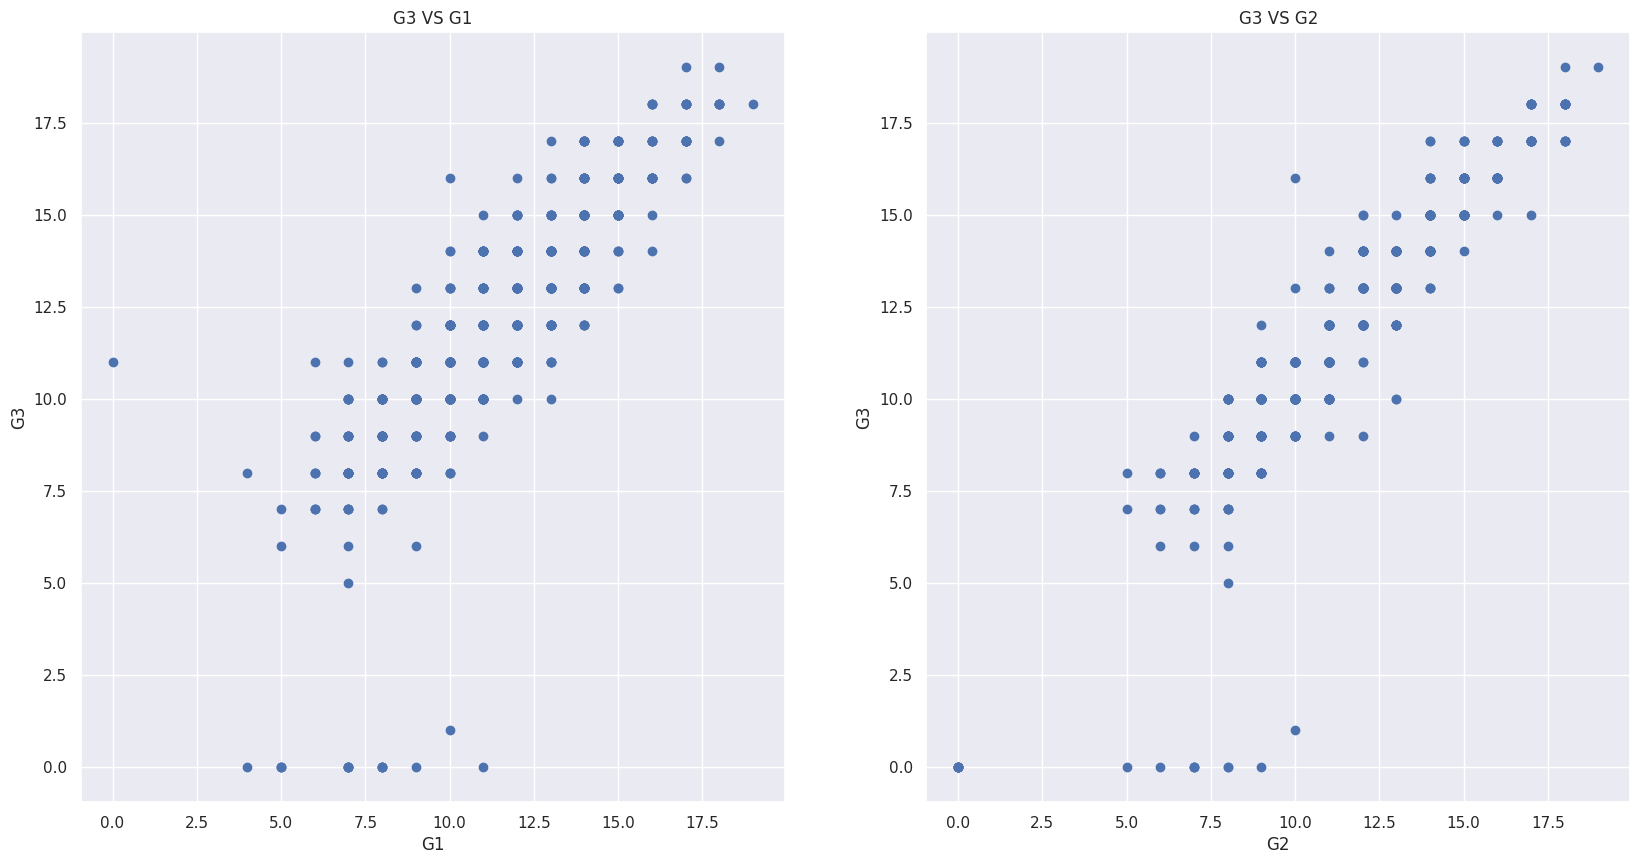

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].scatter(data=grade_df, x='G1', y='G3')
axes[0].set_title('G3 VS G1')
axes[0].set_xlabel('G1')
axes[0].set_ylabel('G3')
axes[1].scatter(data=grade_df, x='G2', y='G3')
axes[1].set_title('G3 VS G2')
axes[1].set_xlabel('G2')
axes[1].set_ylabel('G3')
plt.show()

In [ ]:
grade_df.drop(columns=['G1','G2'],inplace=True)
grade_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,10


### We chose G3 as our response and dropped G1 and G2 since we do not need to use them to predict G3.

### Reason: From the scatterplot, we can assume that students usually have roughly the same grade in the first and second periods and the final grade since points are scattered around the line y=x.  

# Data Cleaning 

In [ ]:
grade_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,649,2,GP,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,649,2,F,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,649.0,NaN,NaN,NaN,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
address,649,2,U,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,649,2,GT3,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,649,2,T,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,649.0,NaN,NaN,NaN,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,NaN,NaN,NaN,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
Mjob,649,5,other,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,649,5,other,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for NULL values and duplicates

In [ ]:
grade_df.info() ##no null values
grade_df.drop_duplicates() ##no duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,10


### We have decided to use One Hot encoding to encode all categorical variables. 

In [ ]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
grade_cat = grade_df[['failures','school','sex','address','famsize','Pstatus','Medu','Fedu','Fjob','Mjob','reason','guardian','traveltime','studytime','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health']]
ohe.fit(grade_cat)
grade_cat_ohe = pd.DataFrame(ohe.transform(grade_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(grade_cat.columns)) #change ohe.get_feature_names_out to ohe.get_feature_names if not working

# Check the encoded variables
grade_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 95 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   failures_0         649 non-null    float64
 1   failures_1         649 non-null    float64
 2   failures_2         649 non-null    float64
 3   failures_3         649 non-null    float64
 4   school_GP          649 non-null    float64
 5   school_MS          649 non-null    float64
 6   sex_F              649 non-null    float64
 7   sex_M              649 non-null    float64
 8   address_R          649 non-null    float64
 9   address_U          649 non-null    float64
 10  famsize_GT3        649 non-null    float64
 11  famsize_LE3        649 non-null    float64
 12  Pstatus_A          649 non-null    float64
 13  Pstatus_T          649 non-null    float64
 14  Medu_0             649 non-null    float64
 15  Medu_1             649 non-null    float64
 16  Medu_2             649 non

In [ ]:
#combining numeric fratures with OHE categorical feature
#grade_num=grade_df[['age','absences']]
grade_res=grade_df[['age','absences','G3']]
grade_ohe=pd.concat([grade_cat_ohe,grade_res],
                   sort=False,axis=1).reindex(index=grade_res.index)

grade_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 98 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   failures_0         649 non-null    float64
 1   failures_1         649 non-null    float64
 2   failures_2         649 non-null    float64
 3   failures_3         649 non-null    float64
 4   school_GP          649 non-null    float64
 5   school_MS          649 non-null    float64
 6   sex_F              649 non-null    float64
 7   sex_M              649 non-null    float64
 8   address_R          649 non-null    float64
 9   address_U          649 non-null    float64
 10  famsize_GT3        649 non-null    float64
 11  famsize_LE3        649 non-null    float64
 12  Pstatus_A          649 non-null    float64
 13  Pstatus_T          649 non-null    float64
 14  Medu_0             649 non-null    float64
 15  Medu_1             649 non-null    float64
 16  Medu_2             649 non

# Identifying top features affecting G3. (Feature importance/Feature selection)

[0.01194674 0.00839321 0.00237388 0.00178641 0.01011981 0.0111493
 0.01360328 0.01397114 0.01053233 0.01084548 0.01384866 0.01372672
 0.00820981 0.00799149 0.00046434 0.01023767 0.01306133 0.01196448
 0.01274354 0.00099982 0.01208806 0.01485785 0.01197473 0.01075578
 0.00556142 0.00327836 0.0168127  0.01407547 0.0046413  0.01088283
 0.00633168 0.01401423 0.01157955 0.00703198 0.01522086 0.01332824
 0.00948426 0.01207722 0.01156687 0.01368714 0.00406448 0.01491437
 0.01404855 0.00638892 0.00230533 0.01348727 0.01523661 0.01085017
 0.0055789  0.006167   0.00686161 0.01650297 0.0154436  0.00467419
 0.00523477 0.01432199 0.01449173 0.01077509 0.01052644 0.0064806
 0.0064521  0.01087012 0.01096469 0.01431731 0.01330305 0.00298424
 0.00388499 0.01033628 0.01691288 0.01400184 0.00621542 0.01183338
 0.01671793 0.01442126 0.00879376 0.00670209 0.01407473 0.01487014
 0.01271623 0.01239088 0.01243422 0.01057844 0.00431136 0.00288478
 0.00258956 0.01431533 0.01320588 0.01422944 0.00889477 0.005191

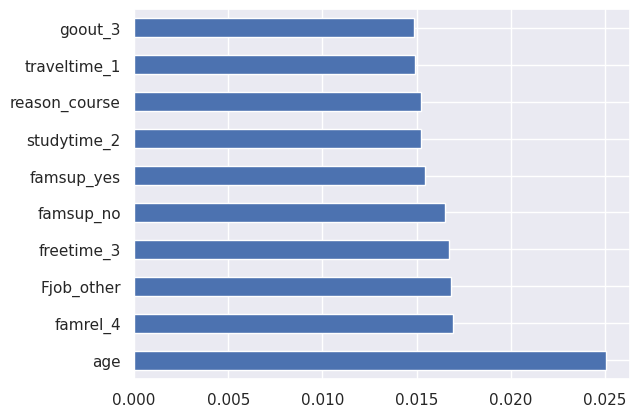

In [ ]:
X = grade_ohe.iloc[:,0:96]  #independent columns
y = grade_ohe.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### The top features based on our domain knowledge and Extra Tree Classifier are freetime, famrel, studytime, age, Fjob and Mjob.

Extra Trees Classifier constructs multiple decision tree, and the top feature selection is selected based on number of times a particular feature appears in the decision trees. 

### Since Extra Trees Classifier does not consider the correlation between the response and predictor. As a result, it is likely that some selected features have a high/low correlation with the response variable, which can affect the performance of the model.

# Exploratory data analysis (EDA) on Top 6 Variables

##age

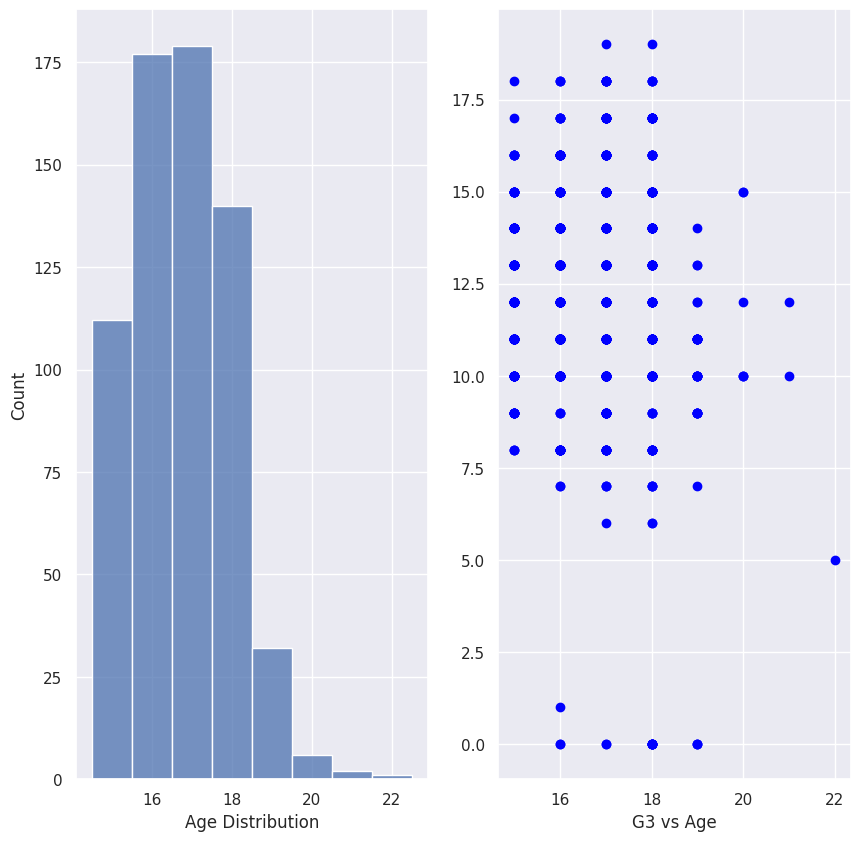

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].set(xlabel='Age Distribution')
sb.histplot(grade_df.age, discrete=True, ax=axes[0])
axes[1].set(xlabel='G3 vs Age')
axes[1].scatter(top6df.age, grade_df.G3, color = "blue")
plt.show()

<Axes: title={'center': 'G3 vs age Boxplot'}, xlabel='age', ylabel='G3'>

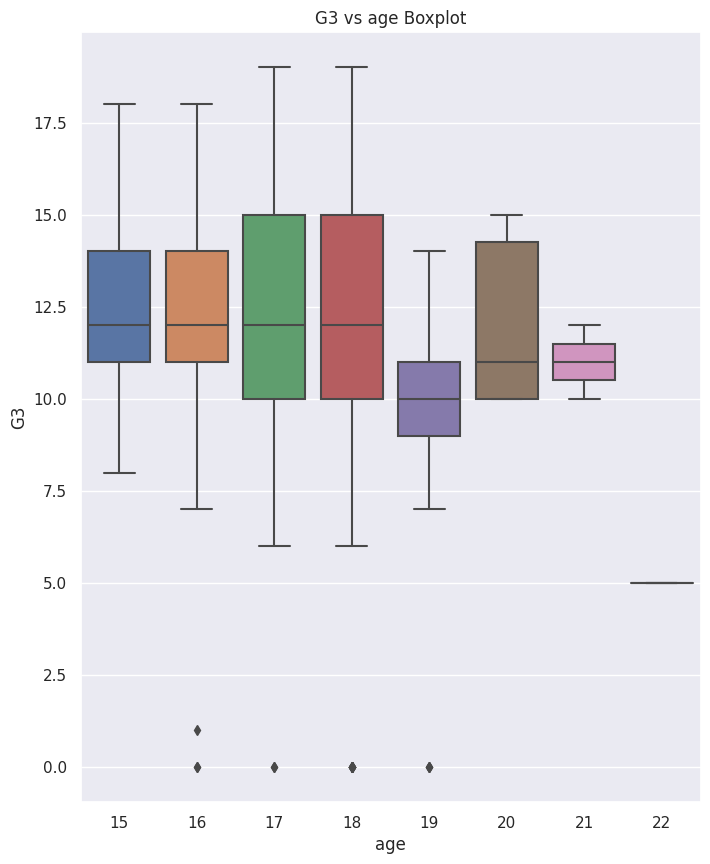

In [ ]:
f = plt.figure(figsize=(8, 10))
plt.title('G3 vs age Boxplot')
sb.boxplot(x='age',y='G3',data=grade_df)

From the age distribution graph(histogram), majority of the students are between 16 and 17 years old. From the G3 vs Age graph(scatterplot), we can see that students between the age of 17 and 18 generally scored higher compared to other age groups. Furthermore, from the scatterplot, it shows that G3 have a non-linear relationship with Age.

From the boxplot, students between 15 to 18 have a higher median.

## freetime


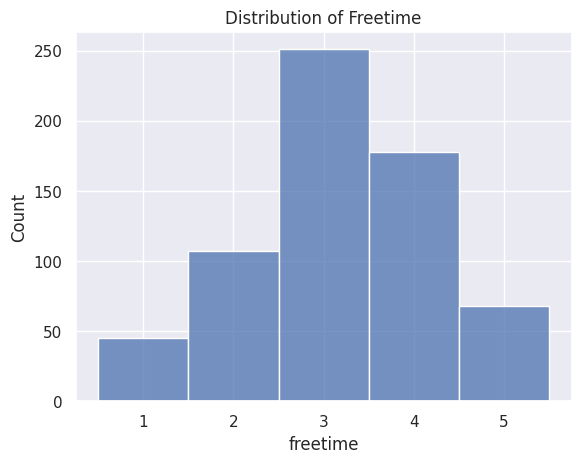

In [ ]:
sb.histplot(grade_df.freetime, discrete=True)
plt.title('Distribution of Freetime')
plt.show()

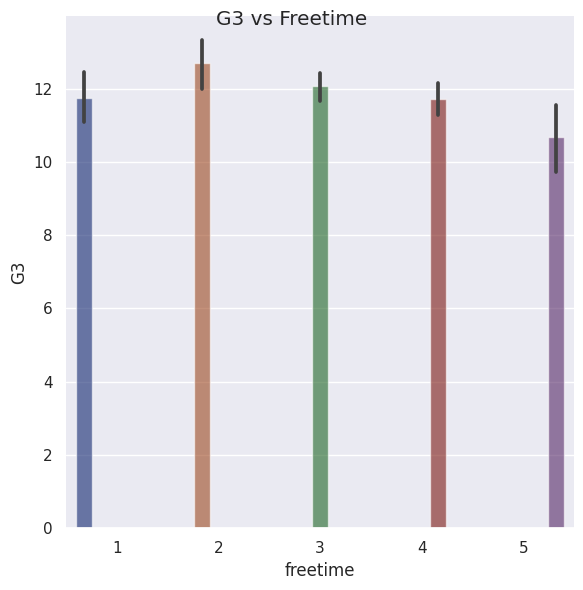

In [ ]:
g = sb.catplot(
    data=grade_df, kind="bar",
    x="freetime", y="G3", hue="freetime",
     palette="dark", alpha=.6, height=6,
)
g.despine(left=True)
g.set_axis_labels("freetime", "G3")
g.fig.suptitle('G3 vs Freetime')
plt.show()

<Axes: title={'center': 'G3 vs freetime Boxplot'}, xlabel='freetime', ylabel='G3'>

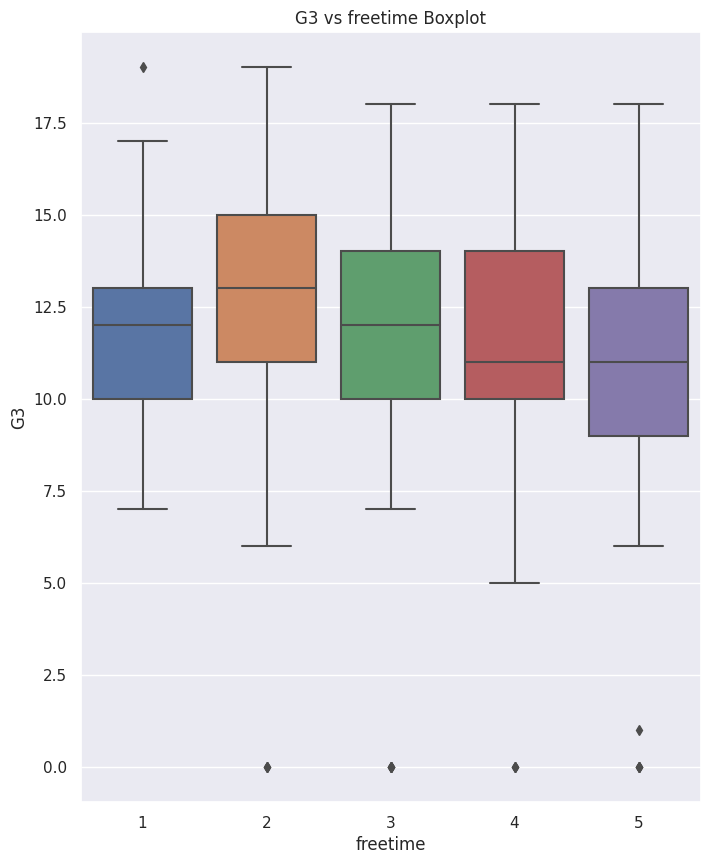

In [ ]:
f = plt.figure(figsize=(8, 10))
plt.title('G3 vs freetime Boxplot')
sb.boxplot(x='freetime',y='G3',data=grade_df)

From distribution of freetime graph(histogram), it shows that students generally have moderate amount of free time after school. However, in the G3 vs freetime graph(cat plot), it shows that students that generally have lesser time after school have higher grades. 

From the boxplot, students' freetime that fall under category 2 have a higher median comapred to the other categories. There seems to be a negative relationship between freetime and G3. Median decreases from freetime=2 to freetime=5.

Reason: Students who spend more time studying would indicate that they have less freetime and so score higher.

freetime = 1 is an outlier since it does not follow the downward trend.

Possible reason: A lot of responsibilities other than studying which compromises their grades.

## famrel

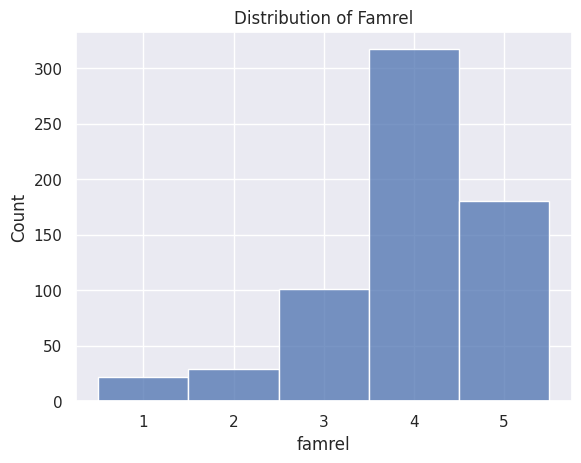

In [ ]:
sb.histplot(grade_df.famrel, discrete=True)
plt.title('Distribution of Famrel')
plt.show()

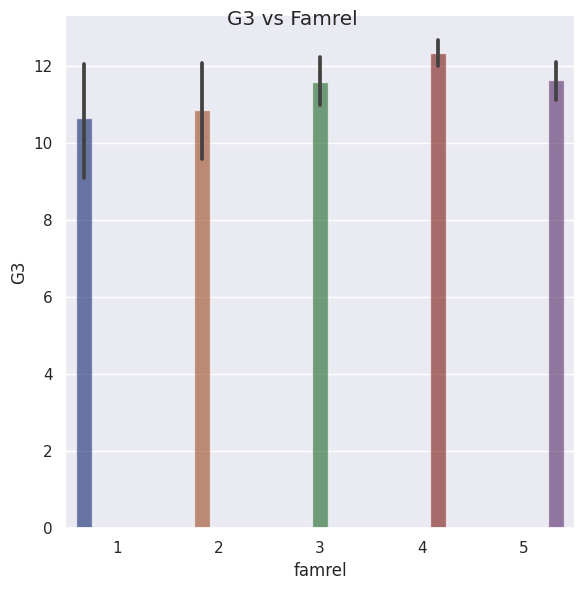

In [ ]:
g = sb.catplot(
    data=grade_df, kind="bar",
    x="famrel", y="G3", hue="famrel",
     palette="dark", alpha=.6, height=6,
)
g.despine(left=True)
g.set_axis_labels("famrel", "G3")
g.fig.suptitle('G3 vs Famrel')
plt.show()

<Axes: title={'center': 'G3 vs famrel Boxplot'}, xlabel='famrel', ylabel='G3'>

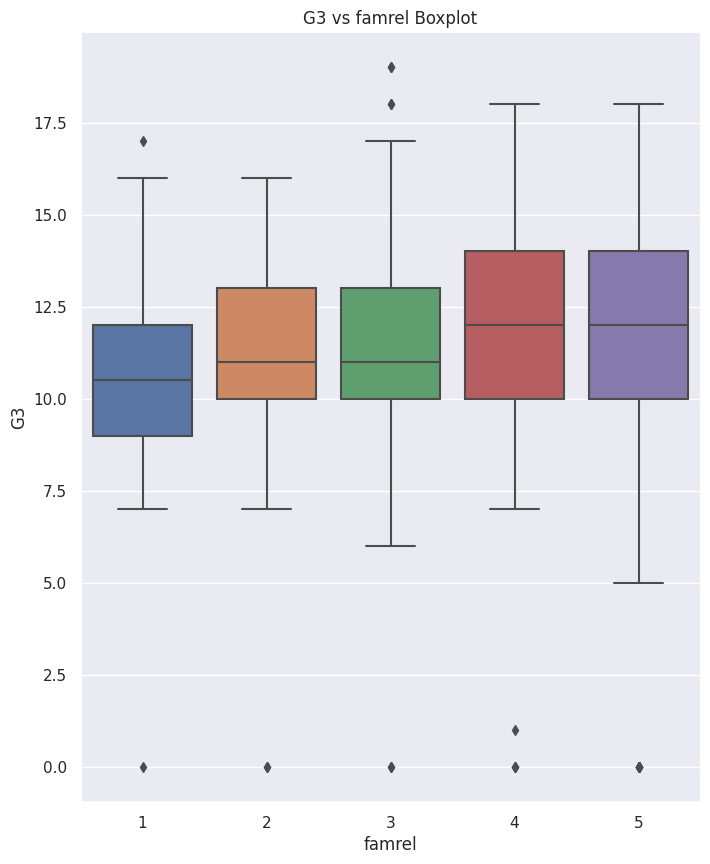

In [ ]:
f = plt.figure(figsize=(8, 10))
plt.title('G3 vs famrel Boxplot')
sb.boxplot(x='famrel',y='G3',data=grade_df)

From the Distribution of famrel graph(histogram), majority of students have very good family relationship. Moreover, from the G3 vs famrel graph(cat plot), it shows that students who have very good to excellent family relationship have higher grades. 

From the boxplot, as famrel increase from 1 to 5, G3 median increases.

## studytime

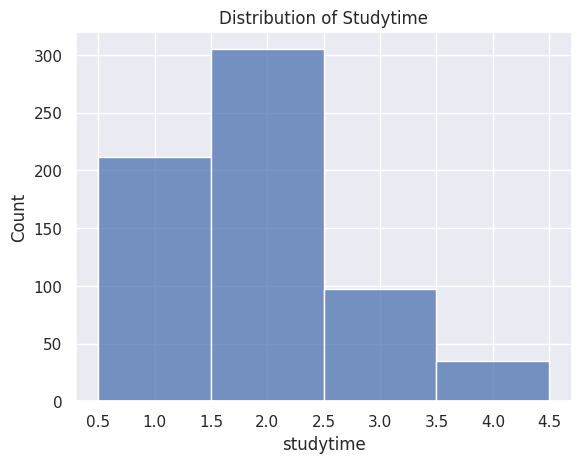

In [ ]:
sb.histplot(grade_df.studytime, discrete=True)
plt.title('Distribution of Studytime')
plt.show()

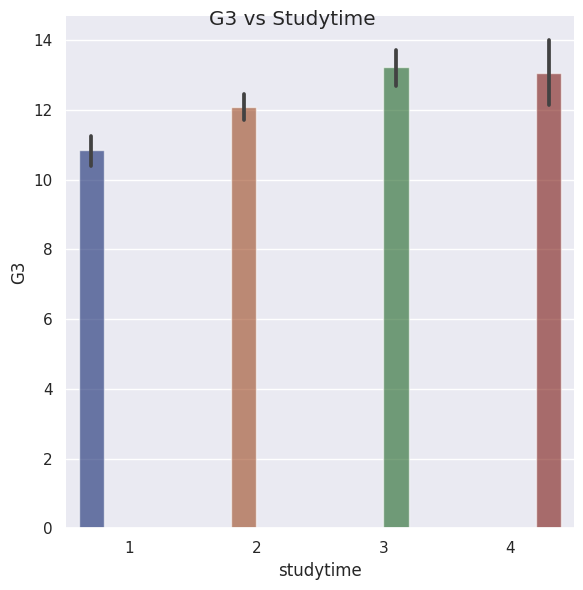

In [ ]:
g = sb.catplot(
    data=grade_df, kind="bar",
    x="studytime", y="G3", hue="studytime",
     palette="dark", alpha=.6, height=6,
)
g.despine(left=True)
g.set_axis_labels("studytime", "G3")
g.fig.suptitle('G3 vs Studytime')
plt.show()

<Axes: title={'center': 'G3 vs studytime Boxplot'}, xlabel='studytime', ylabel='G3'>

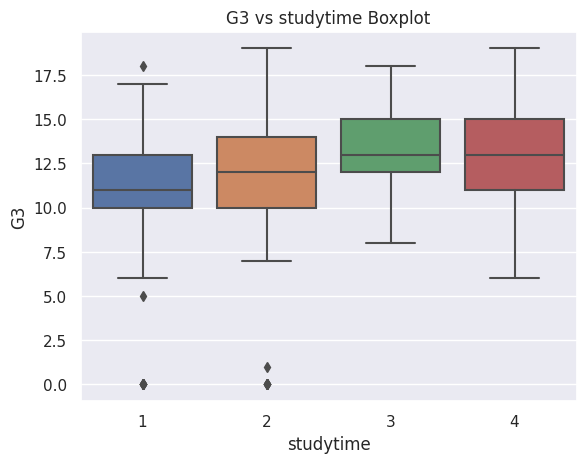

In [ ]:
plt.title('G3 vs studytime Boxplot')
sb.boxplot(x='studytime',y='G3',data=grade_df)

From the Distribution of studytime graph(histogram), majority of students studied 2 to 5 hours weekly. However, from the G3 vs studytime graph(cat plot), it shows that students who studied 5hrs or more scored better than students who studied less than that.

From the boxplot, students' studytime that falls under category 3 or 4 have a higher median compared to the other category. 

## Fjob

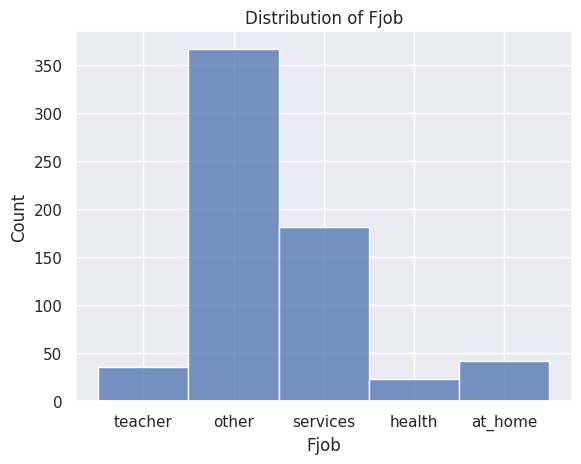

In [ ]:
sb.histplot(grade_df.Fjob, discrete=True)
plt.title('Distribution of Fjob')
plt.show()

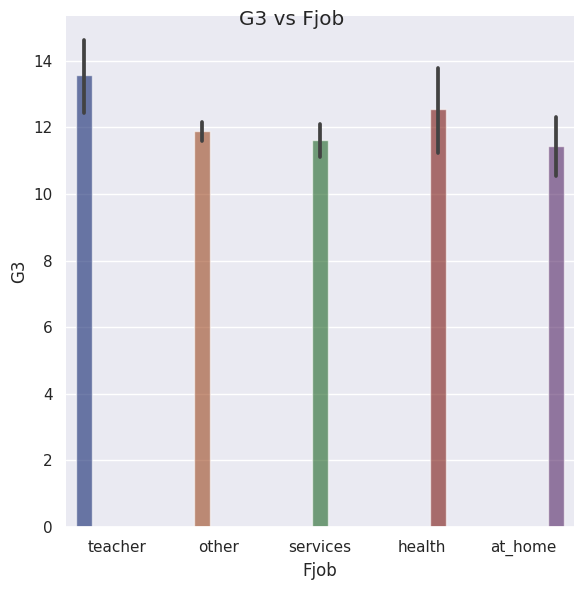

In [ ]:
g = sb.catplot(
    data=grade_df, kind="bar",
    x="Fjob", y="G3", hue="Fjob",
     palette="dark", alpha=.6, height=6,
)
g.despine(left=True)
g.set_axis_labels("Fjob", "G3")
g.fig.suptitle('G3 vs Fjob')
plt.show()

<Axes: title={'center': 'G3 vs Fjob Boxplot'}, xlabel='G3', ylabel='Fjob'>

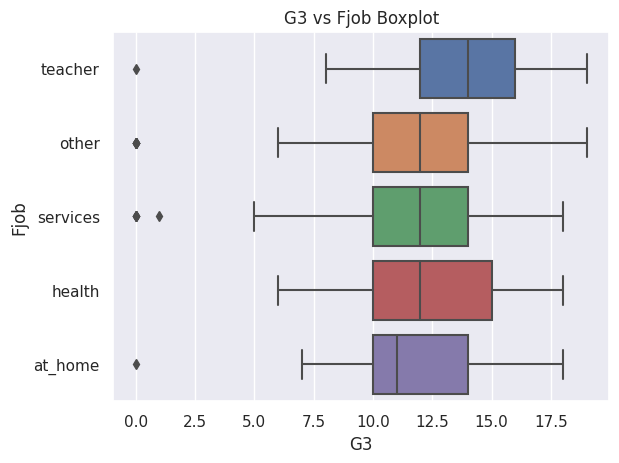

In [ ]:
plt.title('G3 vs Fjob Boxplot')
sb.boxplot(x='G3',y='Fjob',data=grade_df)

From the Distribution of Fjob graph(histogram), majority of students' father work in 'other' catergory. However, from the G3 vs Fjob graph(cat plot), students' fathers who work in the 'teacher' category scored higher.

From the boxplot, students whose father are teachers have the highest median score as well as the highest score of about 18, while the lowest median scores come from students whose fathers are at home.

## Mjob

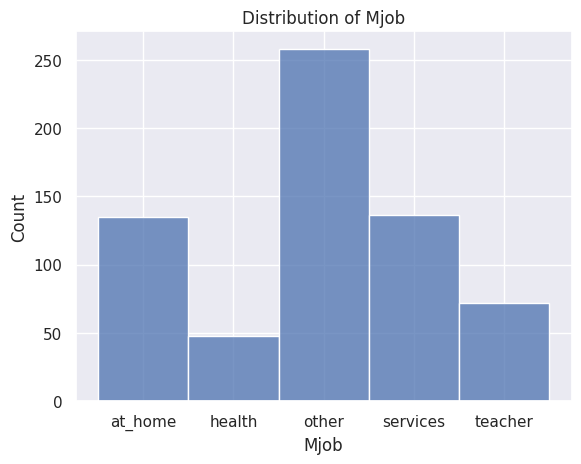

In [ ]:
sb.histplot(grade_df.Mjob, discrete=True)
plt.title('Distribution of Mjob')
plt.show()

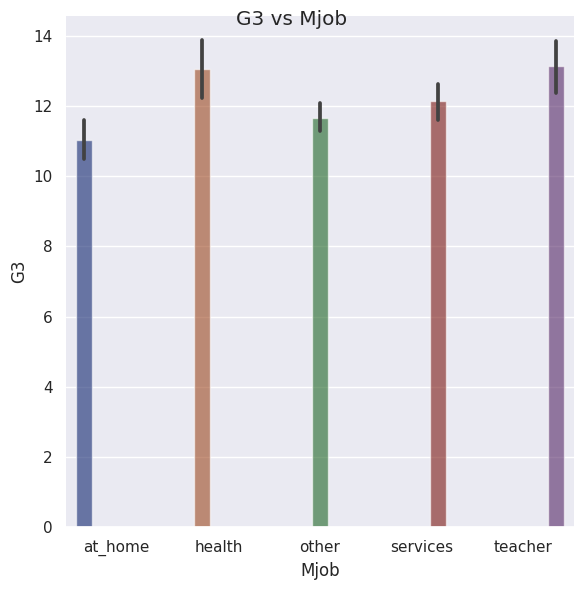

In [ ]:
g = sb.catplot(
    data=grade_df, kind="bar",
    x="Mjob", y="G3", hue="Mjob",
     palette="dark", alpha=.6, height=6,
)
g.despine(left=True)
g.set_axis_labels("Mjob", "G3")
g.fig.suptitle('G3 vs Mjob')
plt.show()

<Axes: title={'center': 'G3 vs Mjob Boxplot'}, xlabel='Mjob', ylabel='G3'>

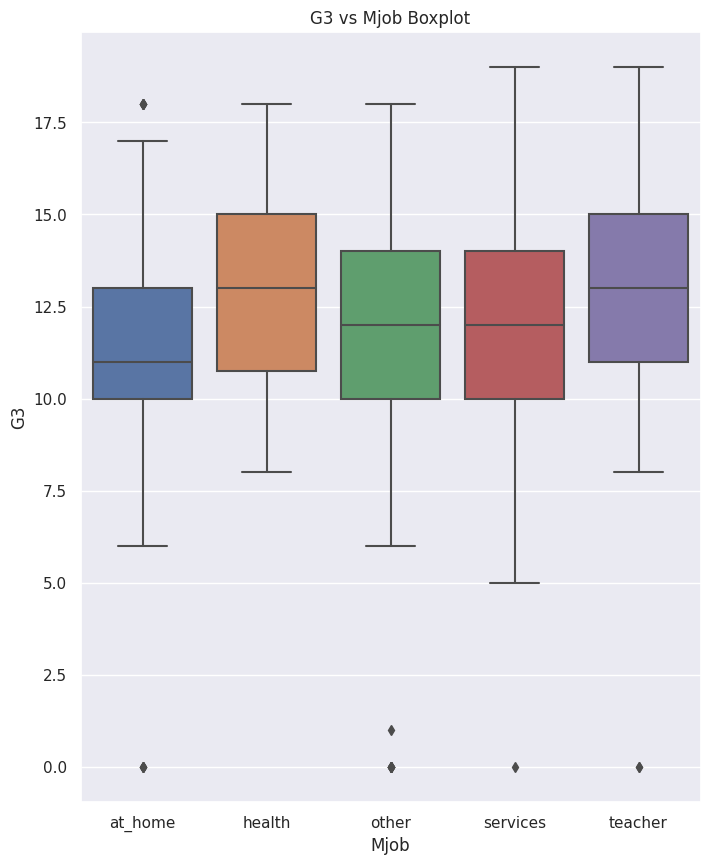

In [ ]:
f = plt.figure(figsize=(8, 10))
plt.title('G3 vs Mjob Boxplot')
sb.boxplot(x='Mjob',y='G3',data=grade_df)


From the Distribution of Fjob graph(histogram), majority of the students whose mothers' job is under the catergory other. However, from the G3 vs Mjob graph(cat plot), majority of students whose mothers' job that fall under the catergory teacher/health scored higher.

From the box plot, students whose mothers' job that falls under the caterogry health and teacher have a higher median compared to jobs that fall under the other catergory. At the same time, job that falls under the catergory teacher have a higher maximum value compared to health.

# Machine Learning (ML)

In [ ]:
top6df_cat=grade_df[['freetime','famrel','studytime','Fjob','Mjob']]
top6df_num=grade_df[['age']]

In [ ]:
ohe.fit(top6df_cat)
top6df_ohe = pd.DataFrame(ohe.transform(top6df_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(top6df_cat.columns)) #change ohe.get_feature_names_out to ohe.get_feature_names if not working

# Check the encoded variables
top6df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   freetime_1     649 non-null    float64
 1   freetime_2     649 non-null    float64
 2   freetime_3     649 non-null    float64
 3   freetime_4     649 non-null    float64
 4   freetime_5     649 non-null    float64
 5   famrel_1       649 non-null    float64
 6   famrel_2       649 non-null    float64
 7   famrel_3       649 non-null    float64
 8   famrel_4       649 non-null    float64
 9   famrel_5       649 non-null    float64
 10  studytime_1    649 non-null    float64
 11  studytime_2    649 non-null    float64
 12  studytime_3    649 non-null    float64
 13  studytime_4    649 non-null    float64
 14  Fjob_at_home   649 non-null    float64
 15  Fjob_health    649 non-null    float64
 16  Fjob_other     649 non-null    float64
 17  Fjob_services  649 non-null    float64
 18  Fjob_teach

In [ ]:
top6df= grade_ohe=pd.concat([top6df_ohe,top6df_num],
                   sort=False,axis=1).reindex(index=top6df_num.index)

top6df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   freetime_1     649 non-null    float64
 1   freetime_2     649 non-null    float64
 2   freetime_3     649 non-null    float64
 3   freetime_4     649 non-null    float64
 4   freetime_5     649 non-null    float64
 5   famrel_1       649 non-null    float64
 6   famrel_2       649 non-null    float64
 7   famrel_3       649 non-null    float64
 8   famrel_4       649 non-null    float64
 9   famrel_5       649 non-null    float64
 10  studytime_1    649 non-null    float64
 11  studytime_2    649 non-null    float64
 12  studytime_3    649 non-null    float64
 13  studytime_4    649 non-null    float64
 14  Fjob_at_home   649 non-null    float64
 15  Fjob_health    649 non-null    float64
 16  Fjob_other     649 non-null    float64
 17  Fjob_services  649 non-null    float64
 18  Fjob_teach

## Top 6 Random Forest

# We gotta change the top6 guys. The score for test set q bad.

In [ ]:
T6_Response=np.array(grade_df['G3'])

T6_Predictor_list=list(top6df_ohe)
top6df_ohe_array=np.array(top6df_ohe)

t6_train_X, t6_test_X, t6_train_Y, t6_test_Y= train_test_split(top6df_ohe_array,T6_Response,test_size=0.25,random_state=0)

#check size (check if there is missing values)
print('Training Features Shape:', t6_train_X.shape)
print('Training Labels Shape:', t6_train_Y.shape)
print('Testing Features Shape:', t6_test_X.shape)
print('Testing Labels Shape:', t6_test_Y.shape)

# Instantiate model with 1000 decision trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

random = RandomForestClassifier(n_estimators = 1000, random_state = 0)
# Train the model on training data
random.fit(t6_train_X, t6_train_Y);

# Use the forest's predict method on the train data
t6_predictions_train = random.predict(t6_train_X)

accuracy = accuracy_score(t6_train_Y, t6_predictions_train)

print("----------Train dataset----------")
print("Accuracy:", accuracy)
print(classification_report(t6_train_Y, t6_predictions_train))

# Use the forest's predict method on the test data
t6_predictions_test = random.predict(t6_test_X)

accuracy = accuracy_score(t6_test_Y, t6_predictions_test)

print("----------Test dataset----------")
print("Accuracy:", accuracy)
print(classification_report(t6_test_Y, t6_predictions_test))

NameError: ignored

## Only keep the random forest with top6 and do linear regression with top 6. Then we compare both models based on the RMSE and decide which one is better


## Linear regression is weird guys. Lets just do decision trees instead. Then our comparison can be between decision tree and random forest

# Decision Tree for top 6

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["freetime_1","freetime_2","freetime_3","freetime_4","freetime_5",
              "famrel_1", "famrel_2", "famrel_3", "famrel_4", "famrel_5",
              "Fjob_at_home","Fjob_health","Fjob_other","Fjob_services","Fjob_teacher",
              "Mjob_at_home","Mjob_health","Mjob_other","Mjob_services","Mjob_teacher",
              "reason_course","reason_home","reason_other","reason_reputation",
              "famsup_no","famsup_yes"]

y = pd.DataFrame(grade_df["G3"])
X = pd.DataFrame(top6df_ohe[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print(classification_report(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print(classification_report(y_test, y_test_pred))
print()

# # Plot the Confusion Matrix for Train and Test
# f, axes = plt.subplots(1, 2, figsize=(12, 4))
# sb.heatmap(confusion_matrix(y_train, y_train_pred),
#            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
# sb.heatmap(confusion_matrix(y_test, y_test_pred), 
#            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])